In [1]:
import os
NIH_14_DATASET_PATH = '../input/data'
dataset_path = os.path.abspath(NIH_14_DATASET_PATH)
os.listdir(dataset_path)

['images_003',
 'images_012',
 'LOG_CHESTXRAY.pdf',
 'README_CHESTXRAY.pdf',
 'BBox_List_2017.csv',
 'images_009',
 'images_008',
 'images_007',
 'test_list.txt',
 'images_010',
 'ARXIV_V5_CHESTXRAY.pdf',
 'images_002',
 'images_011',
 'Data_Entry_2017.csv',
 'images_001',
 'train_val_list.txt',
 'images_005',
 'FAQ_CHESTXRAY.pdf',
 'images_004',
 'images_006']

In [2]:
import pandas as pd
data_entry_csv_path = os.path.join(dataset_path, 'Data_Entry_2017.csv')
data = pd.read_csv(data_entry_csv_path)
print(f"Data Shape : {data.shape}")
data.head()

Data Shape : (112120, 12)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
# Removing patients with age greater than 100
data = data[data['Patient Age']<100]

print(f"New dataset dimensions: {data.shape}")


New dataset dimensions: (112104, 12)


In [4]:
data = data[['Image Index', 'Finding Labels']]
print(data.shape)


(112104, 2)


In [5]:
!pip3 install glob2

  Preparing metadata (setup.py) ... - done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=b3d24210bcbe89ac59ddc2f040c01e4659c0752cea2a8f548c0e72253fcd543d
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
Successfully built glob2


In [6]:
import glob2

all_images = sorted(glob2.glob(dataset_path + '/**/*.png'))
print(f'Number of Images: {len(all_images)}')

all_image_paths = {os.path.basename(x): x for x in all_images}

#Add path of images as column to the dataset
data['Path'] = data['Image Index'].map(all_image_paths.get)
data.sample(5, random_state=3)


Number of Images: 112120


,Image Index,Finding Labels,Path
13531,00003520_002.png,No Finding,/kaggle/input/data/images_002/images/00003520_...
45241,00011598_037.png,Effusion|Mass,/kaggle/input/data/images_006/images/00011598_...
40313,00010503_000.png,Infiltration,/kaggle/input/data/images_005/images/00010503_...
81272,00019962_006.png,No Finding,/kaggle/input/data/images_009/images/00019962_...
85415,00021047_013.png,No Finding,/kaggle/input/data/images_010/images/00021047_...


In [7]:
import numpy as np
from itertools import chain
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
print(all_labels)

['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


In [8]:
all_labels = np.delete(all_labels, np.where(all_labels == 'No Finding'))
all_labels = [x for x in all_labels]
all_labels


['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [9]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        # Add a column for each desease
        data[c_label] = data['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
        
print(f"Dataset Dimension: {data.shape}")
data.head()

Dataset Dimension: (112104, 17)


,Image Index,Finding Labels,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,/kaggle/input/data/images_001/images/00000001_...,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,/kaggle/input/data/images_001/images/00000001_...,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,/kaggle/input/data/images_001/images/00000001_...,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,/kaggle/input/data/images_001/images/00000002_...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,/kaggle/input/data/images_001/images/00000003_...,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
label_counts = data['Finding Labels'].value_counts()
label_counts


No Finding                                                         60353
Infiltration                                                        9546
Atelectasis                                                         4214
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: Finding Labels, Length: 836, dtype: int64

In [11]:
data = data.groupby('Finding Labels').filter(lambda x : len(x)>11)
label_counts = data['Finding Labels'].value_counts()
print(label_counts.shape)
print(label_counts)


(198,)
No Finding                                                      60353
Infiltration                                                     9546
Atelectasis                                                      4214
Effusion                                                         3955
Nodule                                                           2705
                                                                ...  
Emphysema|Fibrosis                                                 13
Atelectasis|Nodule|Pleural_Thickening                              12
Cardiomegaly|Consolidation|Infiltration                            12
Effusion|Emphysema|Infiltration|Pneumothorax                       12
Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration       12
Name: Finding Labels, Length: 198, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

train_and_valid_df, test_df = train_test_split(data,
                                               test_size = 0.30,
                                               random_state = 2018,
                                              )

train_df, valid_df = train_test_split(train_and_valid_df,
                                      test_size=0.30,
                                      random_state=2018,
                                     )

print(f'Training: {train_df.shape[0]} Validation: {valid_df.shape[0]} Testing: {test_df.shape[0]}')


Training: 54091 Validation: 23183 Testing: 33118


In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
base_generator = ImageDataGenerator(rescale=1./255)

In [16]:
IMG_SIZE = (224, 224)
def flow_from_dataframe(image_generator, dataframe, batch_size):

    df_gen = image_generator.flow_from_dataframe(dataframe,
                                                 x_col='Path',
                                                 y_col=all_labels,
                                                 target_size=IMG_SIZE,
                                                 classes=all_labels,
                                                 color_mode='rgb',
                                                 class_mode='raw',
                                                 shuffle=False,
                                                 batch_size=batch_size)
    
    return df_gen


In [17]:
train_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe= train_df,
                                batch_size = 32)

valid_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe=valid_df,
                                batch_size = 32)

test_gen = flow_from_dataframe(image_generator=base_generator, 
                               dataframe=test_df,
                               batch_size = 32)


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 54091 validated image filenames.
Found 23183 validated image filenames.
Found 33118 validated image filenames.


In [18]:
train_x, train_y = next(train_gen)
print(f"Image Dimensions: {train_x[1].shape}")
print(f"Labels: {train_y[1]}")

Image Dimensions: (224, 224, 3)
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = DenseNet121(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(all_labels), activation="sigmoid", name="predictions")(x)
model = Model(inputs=img_input, outputs=predictions)


2022-12-07 06:00:00.419705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 06:00:00.544927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 06:00:00.545903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 06:00:00.547049: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

29097984/29084464 [==============================] - 1s 0us/step


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_train = model
output_weights_name='FP_32_NIH_Classification_weights.h5'
checkpoint = ModelCheckpoint(
             output_weights_name,
             save_weights_only=True,
             save_best_only=True,
             verbose=1,
            )

In [22]:
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
import shutil
import warnings
import json

class MultipleClassAUROC(Callback):
    """
    Monitor mean AUROC and update model
    """
    def __init__(self, generator, class_names, weights_path, stats=None):
        super(Callback, self).__init__()
        self.generator = generator
        self.class_names = class_names
        self.weights_path = weights_path
        self.best_weights_path = os.path.join(
            os.path.split(weights_path)[0],
            f"best_{os.path.split(weights_path)[1]}",
        )
        self.best_auroc_log_path = os.path.join(
            os.path.split(weights_path)[0],
            "best_auroc.log",
        )
        self.stats_output_path = os.path.join(
            os.path.split(weights_path)[0],
            ".training_stats.json"
        )
        # for resuming previous training
        if stats:
            self.stats = stats
        else:
            self.stats = {"best_mean_auroc": 0}

        # aurocs log
        self.aurocs = {}
        for c in self.class_names:
            self.aurocs[c] = []

    def on_epoch_end(self, epoch, logs={}):
        """
        Calculate the average of the ROC Curves and save the best group of weights
        according to this metric
        """
        print("\n*********************************")
        self.stats["lr"] = float(kb.eval(self.model.optimizer.lr))
        print(f"Learning Rate actual: {self.stats['lr']}")

        """
        y_hat shape: (#examples, len(labels))
        y: [(#examples, 1), (#examples, 1) ... (#examples, 1)]
        """
        y_hat = self.model.predict_generator(self.generator,steps=self.generator.n/self.generator.batch_size)
        y = self.generator.labels

        print(f"*** epoch#{epoch + 1} ROC Curves Training Phase ***")
        current_auroc = []
        for i in range(len(self.class_names)):
            try:
                score = roc_auc_score(y[:, i], y_hat[:, i])
            except ValueError:
                score = 0
            self.aurocs[self.class_names[i]].append(score)
            current_auroc.append(score)
            print(f"{i+1}. {self.class_names[i]}: {score}")
        print("*********************************")

        mean_auroc = np.mean(current_auroc)
        print(f"Average ROC Curves: {mean_auroc}")
        if mean_auroc > self.stats["best_mean_auroc"]:
            print(f"Update of the result of the ROC Curves of: {self.stats['best_mean_auroc']} a {mean_auroc}")

            # 1. copy best model
            shutil.copy(self.weights_path, self.best_weights_path)

            # 2. update log file
            print(f"Update log files: {self.best_auroc_log_path}")
            with open(self.best_auroc_log_path, "a") as f:
                f.write(f"(epoch#{epoch + 1}) auroc: {mean_auroc}, lr: {self.stats['lr']}\n")

            # 3. write stats output, this is used for resuming the training
            with open(self.stats_output_path, 'w') as f:
                json.dump(self.stats, f)

            print(f"Weight group update {self.weights_path} -> {self.best_weights_path}")
            self.stats["best_mean_auroc"] = mean_auroc
            print("*********************************")
        return


In [23]:
training_stats = {}
auroc = MultipleClassAUROC(
    generator=valid_gen,
    class_names=all_labels,
    weights_path=output_weights_name,
    stats=training_stats
)


In [24]:
from tensorflow.keras.optimizers import Adam
initial_learning_rate=1e-3
optimizer = Adam(lr=initial_learning_rate)
model_train.compile(optimizer=optimizer, loss="binary_crossentropy")


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau
logs_base_dir = os.getcwd()
patience_reduce_lr=2
min_lr=1e-8
callbacks = [
            checkpoint,
            TensorBoard(log_dir=os.path.join(logs_base_dir, "logs"), batch_size=train_gen.batch_size),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience_reduce_lr,
                              verbose=1, mode="min", min_lr=min_lr),
            auroc,
        ]


2022-12-07 06:00:08.198696: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-07 06:00:08.198743: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-07 06:00:08.201510: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-12-07 06:00:08.437442: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-07 06:00:08.437681: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [26]:
epochs=1
fit_history = model_train.fit_generator(
    generator=train_gen,
    steps_per_epoch=train_gen.n/train_gen.batch_size,
    epochs=epochs,
    validation_data=valid_gen,
    validation_steps=valid_gen.n/valid_gen.batch_size,
    callbacks=callbacks,
    shuffle=False
)


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-07 06:00:09.690367: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-07 06:00:22.042168: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


   1/1690 [..............................] - ETA: 9:07:38 - loss: 0.7328

2022-12-07 06:00:29.533098: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-07 06:00:29.533159: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   2/1690 [..............................] - ETA: 25:40 - loss: 0.6319  

2022-12-07 06:00:30.112812: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-07 06:00:30.116751: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-07 06:00:30.322303: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2872 callback api events and 2870 activity events. 
2022-12-07 06:00:30.443779: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-07 06:00:30.586551: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_07_06_00_30

2022-12-07 06:00:30.657763: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_12_07_06_00_30/2b96dae5a938.trace.json.gz
2022-12-07 06:00:30.838450: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] C

1690/1690 [==============================] - 2008s 1s/step - loss: 0.1599 - val_loss: 0.1602

Epoch 00001: val_loss improved from inf to 0.16019, saving model to FP_32_NIH_Classification_weights.h5

*********************************
Learning Rate actual: 0.0010000000474974513


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#1 ROC Curves Training Phase ***
1. Atelectasis: 0.7491930698418937
2. Cardiomegaly: 0.8020205477124094
3. Consolidation: 0.7721010972994686
4. Edema: 0.8637294908481349
5. Effusion: 0.8330438347690514
6. Emphysema: 0.7374856562455044
7. Fibrosis: 0.6445585358669447
8. Hernia: 0.7155549436309446
9. Infiltration: 0.662430579326248
10. Mass: 0.7028513283788631
11. Nodule: 0.6840364873183326
12. Pleural_Thickening: 0.6907854613803632
13. Pneumonia: 0.6961228084170377
14. Pneumothorax: 0.7752665241169435
*********************************
Average ROC Curves: 0.7377985975108671
Update of the result of the ROC Curves of: 0 a 0.7377985975108671
Update log files: best_auroc.log
Weight group update FP_32_NIH_Classification_weights.h5 -> best_FP_32_NIH_Classification_weights.h5
*********************************


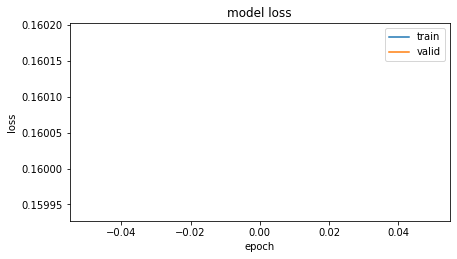

In [27]:
import matplotlib.pyplot as plt

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


In [28]:
pred_y = model_train.predict_generator(test_gen, steps=test_gen.n/test_gen.batch_size, verbose = True)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1034/1034 [==============================] - 885s 855ms/step


Text(0, 0.5, 'True Positive Rate')

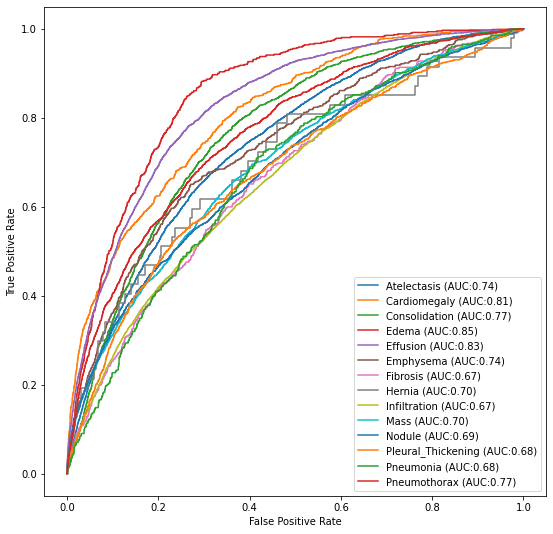

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
test_gen.reset()
test_x, test_y = next(test_gen)
# Space
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    #Points to graph
    fpr, tpr, thresholds = roc_curve(test_gen.labels[:,idx].astype(int), pred_y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    
#convention
c_ax.legend()

#Labels
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')